SyntaxError: invalid syntax (<ipython-input-400-a692fa228d57>, line 3)

In [981]:
import pandas as pd

import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [982]:
# Reading whale returns
whale_returns_csv = Path("/Users/Jerry/Desktop/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv)

whale_returns_df['Date'] = pd.to_datetime(whale_returns_df.Date)
whale_returns_df.set_index('Date', inplace = True)
# SORT TIME FROM EARLIEST TO LATEST
whale_returns_df.sort_index(ascending=True, inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [983]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [984]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
#validate missing nulls
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [985]:
# Reading algorithmic returns
algo_returns_csv = Path("/Users/Jerry/Desktop/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df.Date)
algo_returns_df.set_index('Date', inplace=True)
# SORT TIME FROM EARLIEST TO LATEST
algo_returns_df.sort_index(ascending=True, inplace=True)
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [986]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [987]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [988]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("/Users/Jerry/Desktop/ucb-sfc-fin-pt-08-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df.Date)
sp500_history_df.set_index('Date', inplace= True)
# SORT TIME FROM EARLIEST TO LATEST
sp500_history_df.sort_index(ascending = False, inplace=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [989]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [990]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)
sp500_history_df.head()
sp500_history_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [991]:
# Calculate Daily Returns
# YOUR CODE HERE
sp_daily_returns = sp500_history_df.pct_change()
sp_daily_returns.tail()

,Close
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


In [992]:
# Drop nulls
# YOUR CODE HERE
sp_daily_returns = sp_daily_returns.dropna()


In [993]:
# Validate the missing nulls
sp_daily_returns.isnull().sum()
sp_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [994]:
# Rename Column
# YOUR CODE HERE
sp_daily_returns.rename(columns={'Close':'S&P500'}, inplace = True)
sp_daily_returns

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1020]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp_daily_returns],axis=1,join='inner')
combined_daily_returns_df.index = pd.to_datetime(combined_daily_returns_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
combined_daily_returns_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

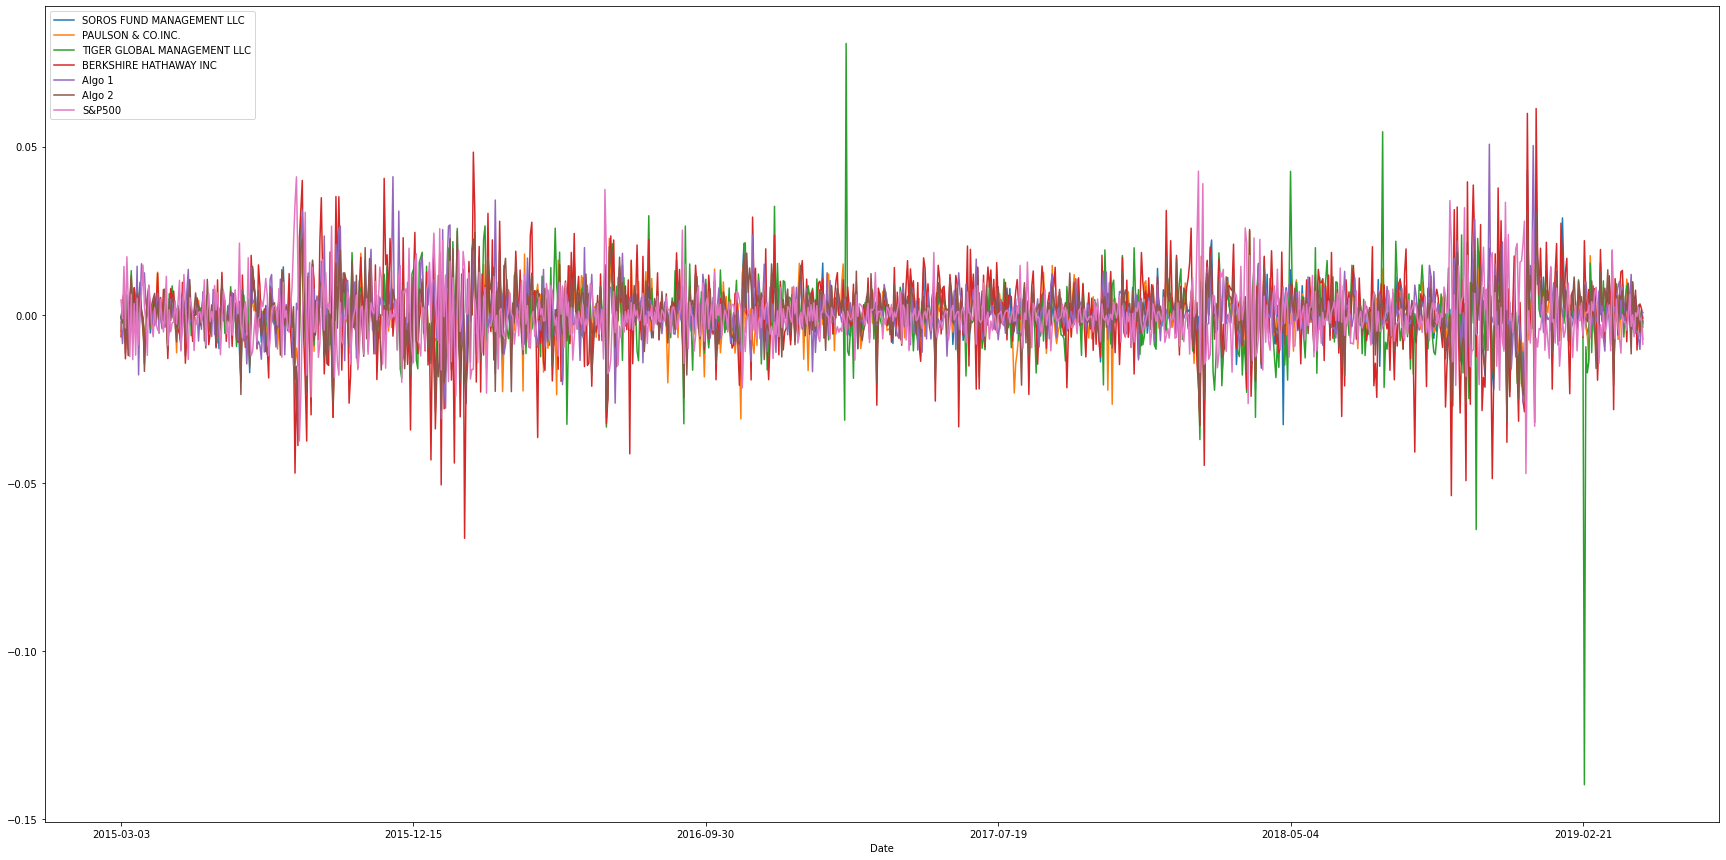

In [1021]:
# Plot daily returns
# YOUR CODE HERE
combined_daily_returns_plot = combined_daily_returns_df.plot(figsize=[30,15])
combined_daily_returns_plot

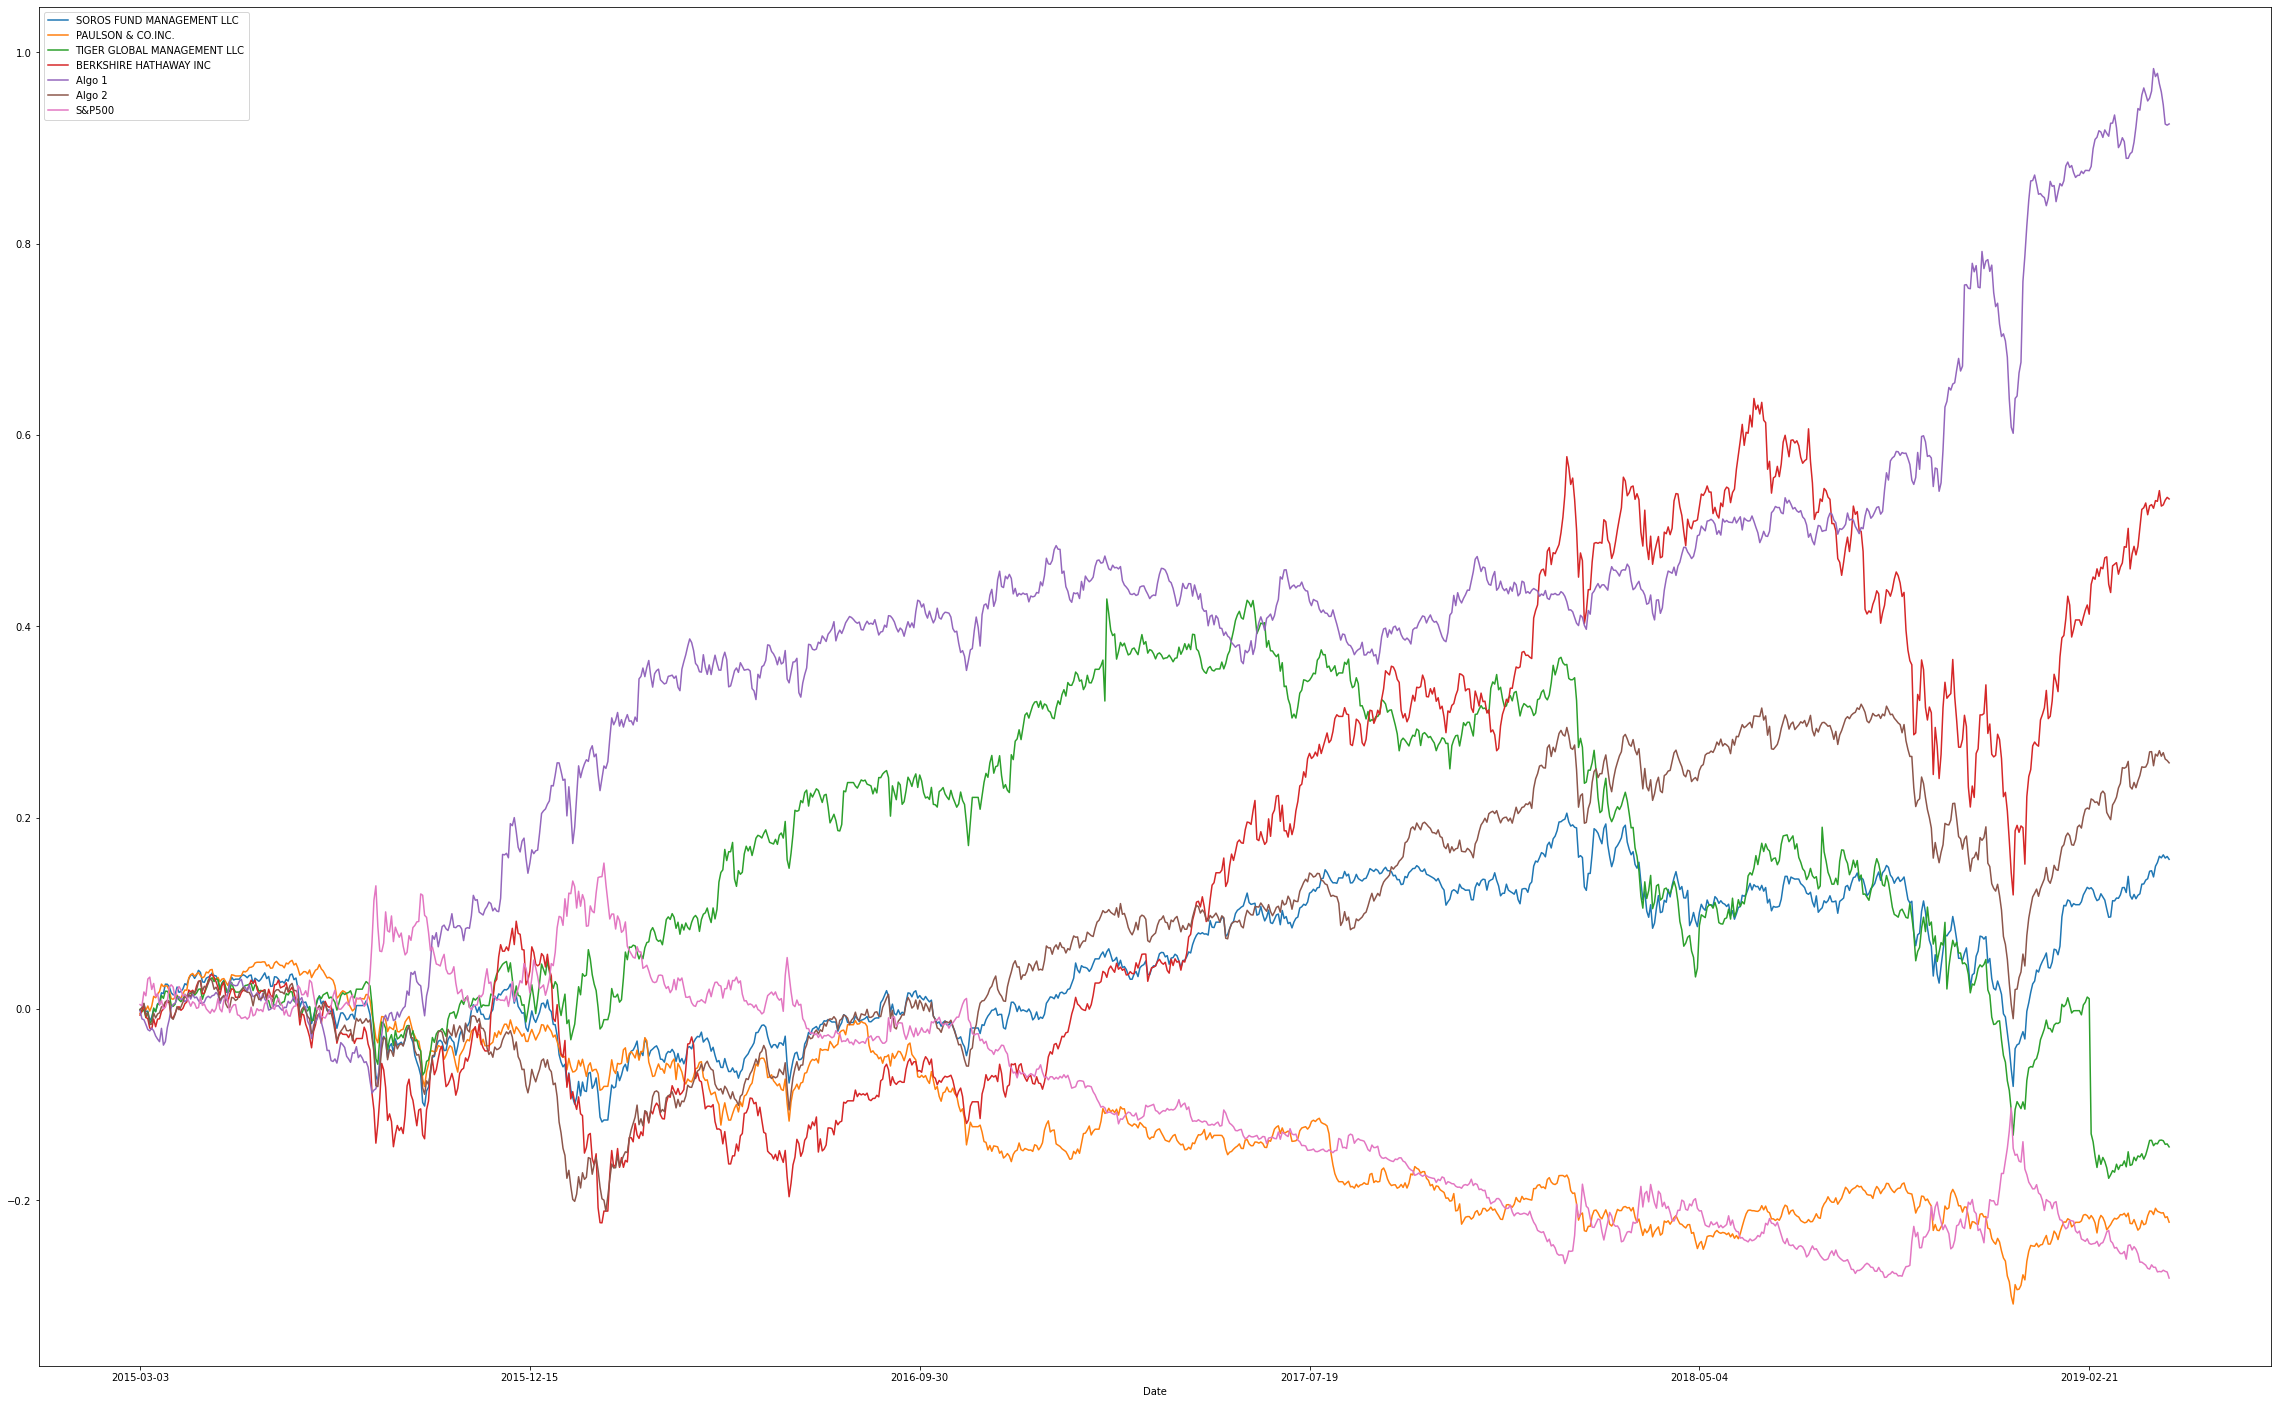

In [1022]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+ combined_daily_returns_df).cumprod()-1
cumulative_returns.plot(figsize=[40,25])

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

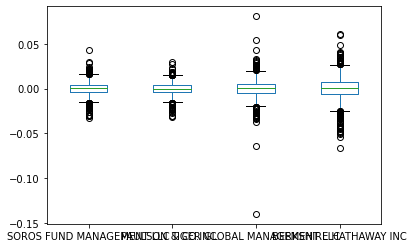

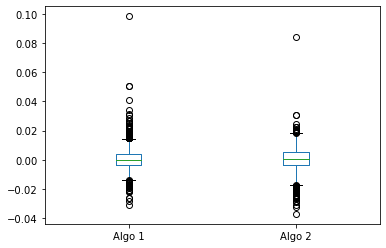

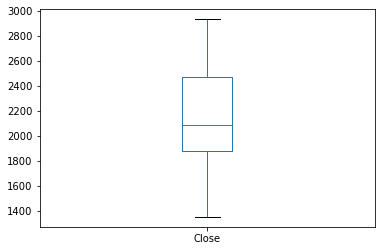

In [1023]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_returns_df.plot(kind='box')
algo_returns_df.plot(kind='box')
sp500_history_df.plot(kind='box')

In [1024]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
whale_std = whale_returns_df.std()
print(f'Whale investment standard deviation:\n \n{whale_std}\n ')




algo_std = algo_returns_df.std()
print(f'Algorithmic investment standard deviation:\n\n{algo_std}\n')





sp500_std = sp_daily_returns.std()
print(f'SP500 standard deviation:\n \n{sp500_std}\n')



Whale investment standard deviation:
 
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
 
Algorithmic investment standard deviation:

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

SP500 standard deviation:
 
S&P500    0.008135
dtype: float64



In [1025]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
# The higher the standard deviation, the riskier the investment.
# calculate portfolio std means.
whale_std_mean = whale_std.mean()
algo_std_mean = algo_std.mean()
sp500_std_mean = sp500_std.mean()
print(f'S&P500 standard deviation is {sp500_std_mean}')
potential_riskier_invest = [whale_std_mean, algo_std_mean]
for x in potential_riskier_invest:
    if x > sp500_std_mean:
        riskier_investment = x 
        print(f'The riskier investment is {x}')
    

S&P500 standard deviation is 0.008134642617809523
The riskier investment is 0.009618471706059284
The riskier investment is 0.008227087477314429


In [1026]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
sp500_annualized_std = sp500_std_mean * np.sqrt(252)
print(f'Annualized S&P500 standard deviation is {sp500_annualized_std}')

Annualized S&P500 standard deviation is 0.12913344822666864


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

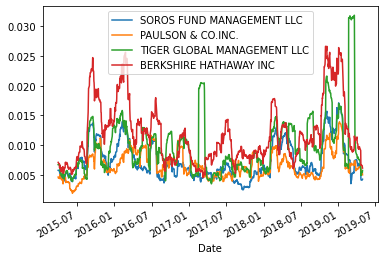

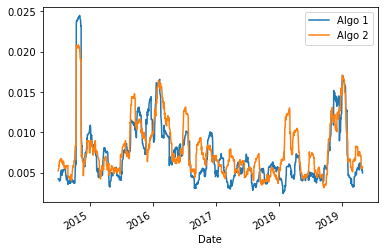

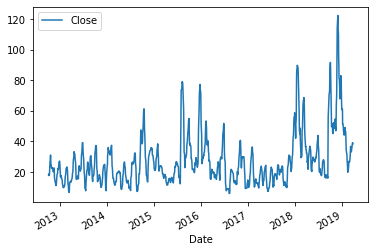

In [1027]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
whale_returns_df.rolling(window=21).std().plot()
algo_returns_df.rolling(window=21).std().plot()
sp500_history_df.rolling(window=21).std().plot()


In [1028]:
# Construct a correlation table
# YOUR CODE HERE
returns_correlation = combined_daily_returns_df.corr()
returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


-0.04787564502402737


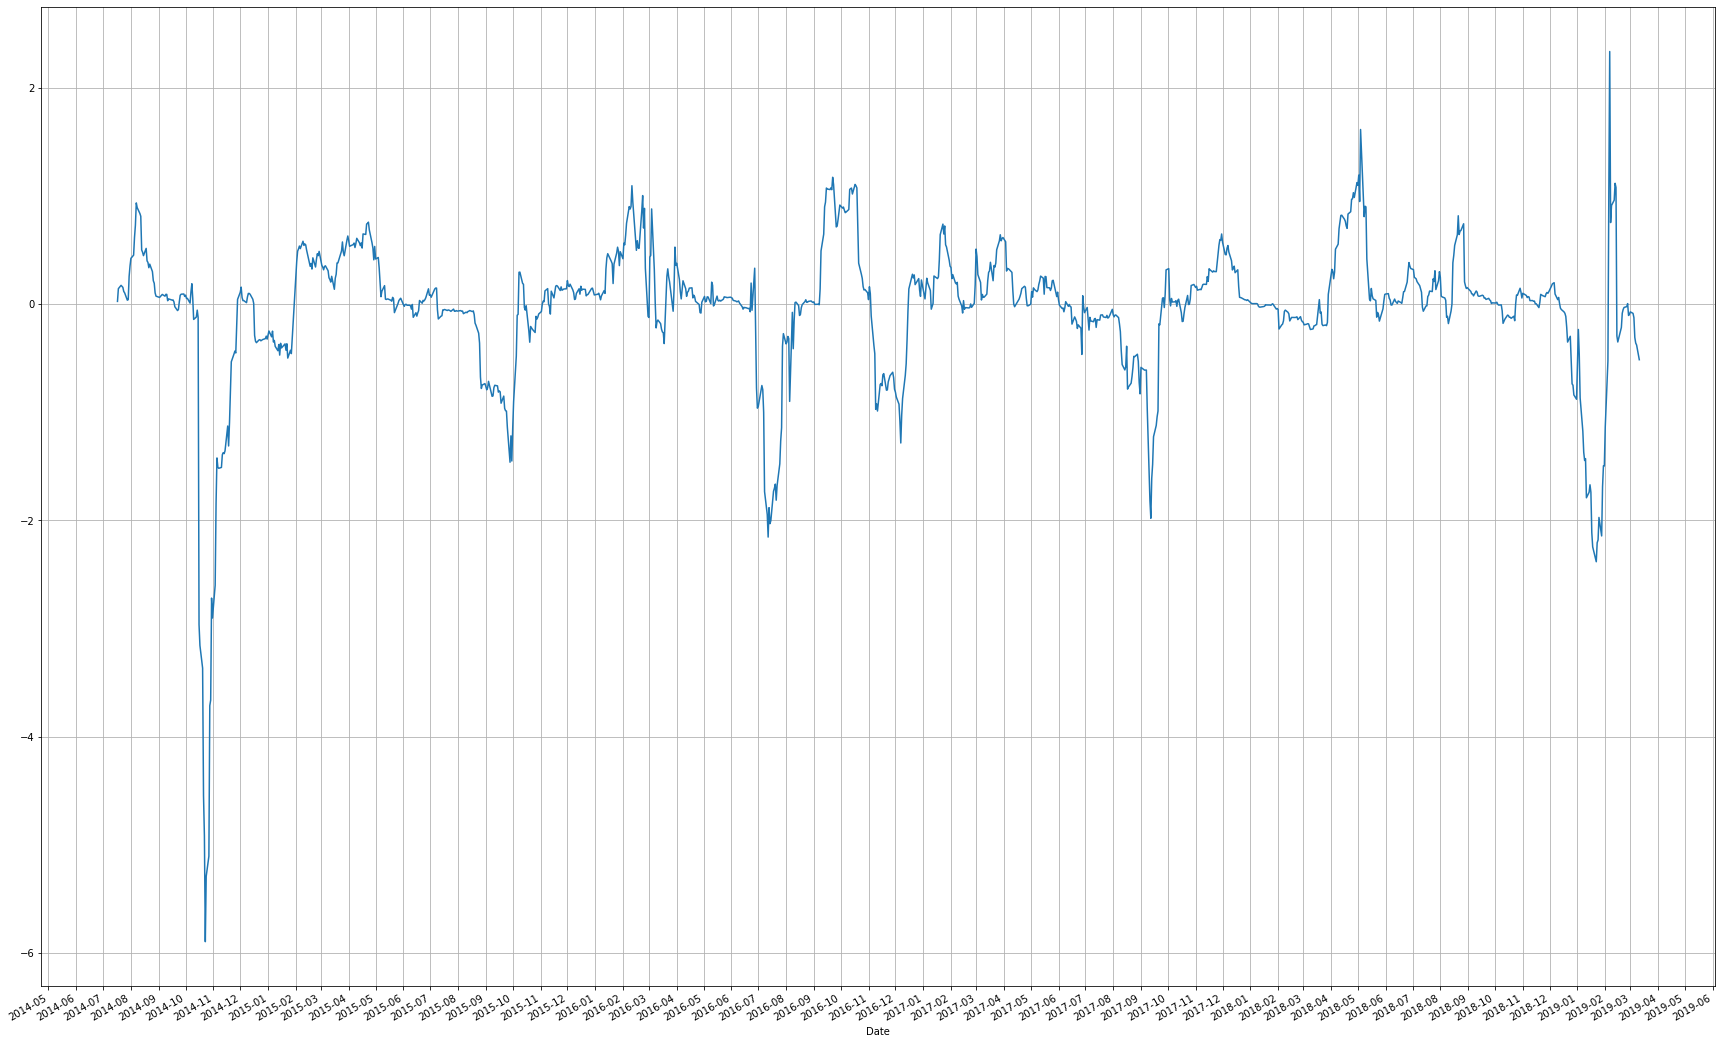

In [1029]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Calculate covariance of daily returns of Algorithmic portfolio vs. S&P 500
covariance_algo1 = algo_returns_df['Algo 1'].cov(sp_daily_returns['S&P500'])
covariance_algo2 = algo_returns_df['Algo 2'].cov(sp_daily_returns['S&P500'])
covariance_algo = covariance_algo1 + covariance_algo1

variance_algo1 = algo_returns_df['Algo 1'].var()
variance_algo2 = algo_returns_df['Algo 2'].var()
variance_algo = variance_algo1 + variance_algo2

beta_algo = covariance_algo / variance_algo
print(beta_algo)

rolling_covariance_algo1 = algo_returns_df['Algo 1'].rolling(window=30).cov(sp_daily_returns['S&P500'])

rolling_covariance_algo2 = algo_returns_df['Algo 2'].rolling(window=30).cov(sp_daily_returns['S&P500'])

rolling_covariance_algo = rolling_covariance_algo1 + rolling_covariance_algo2


rolling_variance_sp500 = sp_daily_returns['S&P500'].rolling(window=(30)).var()

rolling_beta = rolling_covariance_algo / rolling_variance_sp500
date_form = DateFormatter('%Y-%m-%d')
rolling_beta.plot(grid = True, figsize=(30,20)).xaxis.set_major_locator(mdates.MonthLocator(interval=1))






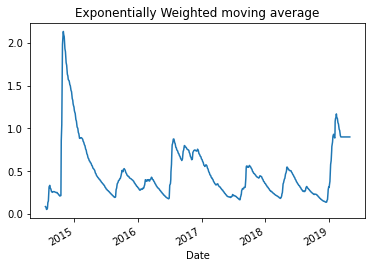

In [1030]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_beta.ewm(halflife = 21).std().plot(title = 'Exponentially Weighted moving average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [1031]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_daily_returns_df.mean() * 252) / (combined_daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

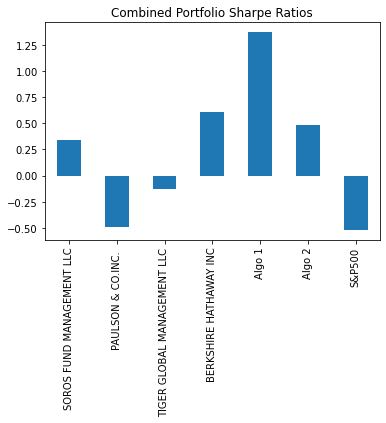

In [1032]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title= 'Combined Portfolio Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1033]:
# Read the first stock
# YOUR CODE HERE
UAL_csv_path = Path('/Users/Jerry/Desktop/UAL - Sheet1.csv')

UAL_df = pd.read_csv(UAL_csv_path,index_col = 'Date',parse_dates=True,infer_datetime_format= True)

UAL_df

,Close
Date,
2016-01-04 16:00:00,55.61
2016-01-05 16:00:00,55.06
2016-01-06 16:00:00,55.20
2016-01-07 16:00:00,52.63
2016-01-08 16:00:00,51.89
...,...
2017-12-22 16:00:00,67.25
2017-12-26 16:00:00,67.35
2017-12-27 16:00:00,67.12


In [1034]:
# Read the second stock
# YOUR CODE HERE
AAPL_csv_path = Path('/Users/Jerry/Desktop/AAPL - Sheet1.csv')
AAPL_df = pd.read_csv(AAPL_csv_path,index_col="Date" ,parse_dates=True,infer_datetime_format= True)
AAPL_df

,Close
Date,
2016-01-04 16:00:00,26.34
2016-01-05 16:00:00,25.68
2016-01-06 16:00:00,25.18
2016-01-07 16:00:00,24.11
2016-01-08 16:00:00,24.24
...,...
2017-12-22 16:00:00,43.75
2017-12-26 16:00:00,42.64
2017-12-27 16:00:00,42.65


In [1035]:
# Read the third stock
# YOUR CODE HERE
AAL_csv_path = Path('/Users/Jerry/Desktop/AAL - Sheet1.csv')
AAL_df = pd.read_csv(AAL_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
AAL_df

,Close
Date,
2016-01-04 16:00:00,40.91
2016-01-05 16:00:00,40.52
2016-01-06 16:00:00,41.23
2016-01-07 16:00:00,40.45
2016-01-08 16:00:00,40.37
...,...
2017-12-22 16:00:00,52.59
2017-12-26 16:00:00,52.85
2017-12-27 16:00:00,52.40


In [1036]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_custom_df = pd.concat([UAL_df, AAPL_df, AAL_df], axis = 'columns', join='inner')

combined_custom_df



,Close,Close,Close
Date,,,
2016-01-04 16:00:00,55.61,26.34,40.91
2016-01-05 16:00:00,55.06,25.68,40.52
2016-01-06 16:00:00,55.20,25.18,41.23
2016-01-07 16:00:00,52.63,24.11,40.45
2016-01-08 16:00:00,51.89,24.24,40.37
...,...,...,...
2017-12-22 16:00:00,67.25,43.75,52.59
2017-12-26 16:00:00,67.35,42.64,52.85
2017-12-27 16:00:00,67.12,42.65,52.40


In [1037]:

# YOUR CODE HERE
combined_custom_df.index = pd.to_datetime(combined_custom_df.index, format = "%Y-%m-%d").strftime("%Y-%m-%d")





In [1038]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
combined_custom_df.columns=(['UAL','AAPL','AAL'])

In [1039]:
# Drop Nulls
# YOUR CODE HERE
combined_custom_df.dropna()

,UAL,AAPL,AAL
Date,,,
2016-01-04,55.61,26.34,40.91
2016-01-05,55.06,25.68,40.52
2016-01-06,55.20,25.18,41.23
2016-01-07,52.63,24.11,40.45
2016-01-08,51.89,24.24,40.37
...,...,...,...
2017-12-22,67.25,43.75,52.59
2017-12-26,67.35,42.64,52.85
2017-12-27,67.12,42.65,52.40


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1040]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
custom_daily_returns_df = combined_custom_df.pct_change()
print(custom_daily_returns_df)
portfolio_returns = custom_daily_returns_df.dot(weights)
portfolio_returns



                 UAL      AAPL       AAL
Date                                    
2016-01-04       NaN       NaN       NaN
2016-01-05 -0.009890 -0.025057 -0.009533
2016-01-06  0.002543 -0.019470  0.017522
2016-01-07 -0.046558 -0.042494 -0.018918
2016-01-08 -0.014060  0.005392 -0.001978
...              ...       ...       ...
2017-12-22 -0.000446  0.000000 -0.003789
2017-12-26  0.001487 -0.025371  0.004944
2017-12-27 -0.003415  0.000235 -0.008515
2017-12-28  0.006257  0.002814  0.001145
2017-12-29 -0.002073 -0.010755 -0.008197

[503 rows x 3 columns]


Date
2016-01-04         NaN
2016-01-05   -0.014827
2016-01-06    0.000198
2016-01-07   -0.035990
2016-01-08   -0.003549
                ...   
2017-12-22   -0.001411
2017-12-26   -0.006314
2017-12-27   -0.003898
2017-12-28    0.003405
2017-12-29   -0.007008
Length: 503, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1050]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

Fund_returns = pd.concat([custom_daily_returns_df,combined_daily_returns_df],axis=1,join='inner')

Fund_returns

,UAL,AAPL,AAL,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485,-0.002008
2016-01-05,-0.009890,-0.025057,-0.009533,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.013290
2016-01-06,0.002543,-0.019470,0.017522,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,0.024276
2016-01-07,-0.046558,-0.042494,-0.018918,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,0.010957
2016-01-08,-0.014060,0.005392,-0.001978,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000853
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,-0.000446,0.000000,-0.003789,0.000544,-0.003964,0.003543,0.000607,-0.000844,0.000511,0.001060
2017-12-26,0.001487,-0.025371,0.004944,-0.000086,0.001307,-0.001170,-0.003018,-0.007740,0.002576,-0.000790
2017-12-27,-0.003415,0.000235,-0.008515,-0.003361,-0.000916,-0.001548,0.000239,0.001046,-0.000624,-0.001831


In [1051]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
Fund_returns.dropna()

,UAL,AAPL,AAL,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,,,
2016-01-05,-0.009890,-0.025057,-0.009533,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.013290
2016-01-06,0.002543,-0.019470,0.017522,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,0.024276
2016-01-07,-0.046558,-0.042494,-0.018918,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,0.010957
2016-01-08,-0.014060,0.005392,-0.001978,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000853
2016-01-11,-0.005203,0.016089,0.017587,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.007742
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,-0.000446,0.000000,-0.003789,0.000544,-0.003964,0.003543,0.000607,-0.000844,0.000511,0.001060
2017-12-26,0.001487,-0.025371,0.004944,-0.000086,0.001307,-0.001170,-0.003018,-0.007740,0.002576,-0.000790
2017-12-27,-0.003415,0.000235,-0.008515,-0.003361,-0.000916,-0.001548,0.000239,0.001046,-0.000624,-0.001831


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [1054]:
# Risk
# YOUR CODE HERE
Fund_returns_std = Fund_returns.std()
Fund_returns_std

UAL                            0.021459
AAPL                           0.013071
AAL                            0.020676
SOROS FUND MANAGEMENT LLC      0.006644
PAULSON & CO.INC.              0.007180
TIGER GLOBAL MANAGEMENT LLC    0.009352
BERKSHIRE HATHAWAY INC         0.011666
Algo 1                         0.006976
Algo 2                         0.007843
S&P500                         0.006534
dtype: float64

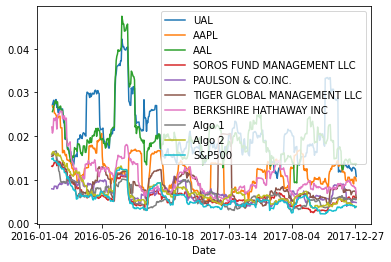

In [1061]:
# Rolling
# YOUR CODE HERE
Fund_returns.rolling(window=21).std().plot()

In [1063]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
ALL_portfolio_SRatios = (Fund_returns.mean() * 252) / (Fund_returns_std * np.sqrt(252))
ALL_portfolio_SRatios

UAL                            0.455079
AAPL                           1.250626
AAL                            0.531985
SOROS FUND MANAGEMENT LLC      0.658823
PAULSON & CO.INC.             -0.818164
TIGER GLOBAL MANAGEMENT LLC    0.900371
BERKSHIRE HATHAWAY INC         0.845771
Algo 1                         0.748438
Algo 2                         1.102014
S&P500                        -1.359425
dtype: float64

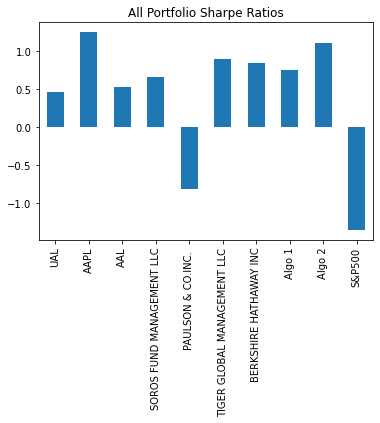

In [1066]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
ALL_portfolio_SRatios.plot(kind='bar', title="All Portfolio Sharpe Ratios")

In [1068]:
# Create a correlation analysis
# YOUR CODE HERE
Fund_returns.corr()

,UAL,AAPL,AAL,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
UAL,1.000000,0.315349,0.791985,0.471528,0.305027,0.285799,0.402996,0.231085,0.487320,0.038193
AAPL,0.315349,1.000000,0.256834,0.446542,0.303185,0.304759,0.500792,0.146646,0.407155,0.043751
AAL,0.791985,0.256834,1.000000,0.490074,0.347737,0.275246,0.428117,0.253729,0.489661,0.068358
SOROS FUND MANAGEMENT LLC,0.471528,0.446542,0.490074,1.000000,0.602867,0.498841,0.695911,0.251298,0.798274,0.082497
PAULSON & CO.INC.,0.305027,0.303185,0.347737,0.602867,1.000000,0.264062,0.401328,0.184040,0.574850,0.114399
TIGER GLOBAL MANAGEMENT LLC,0.285799,0.304759,0.275246,0.498841,0.264062,1.000000,0.367614,0.139501,0.426681,0.069282
BERKSHIRE HATHAWAY INC,0.402996,0.500792,0.428117,0.695911,0.401328,0.367614,1.000000,0.240405,0.578211,0.092942
Algo 1,0.231085,0.146646,0.253729,0.251298,0.184040,0.139501,0.240405,1.000000,0.219488,-0.008112
Algo 2,0.487320,0.407155,0.489661,0.798274,0.574850,0.426681,0.578211,0.219488,1.000000,0.063438
S&P500,0.038193,0.043751,0.068358,0.082497,0.114399,0.069282,0.092942,-0.008112,0.063438,1.000000


In [1074]:
# Beta
# YOUR CODE HERE

covariance_UAL = Fund_returns['UAL'].cov(Fund_returns['S&P500'])
variance_UAL = Fund_returns['UAL'].var()

beta_UAL = covariance_UAL / variance_UAL
print(beta_UAL)







0.011640353788984379
